# Style Transfer for the Masses with Turi Create and Google Colab

In [1]:
from datetime import datetime
timestamp = datetime.now().strftime("%Y_%m_%d_%H%M%S")
print("Date: ", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Date:  2018-12-18 09:25:34


Useful Tutorials:



*  [Google Colaboratory: A Poor Man’s GPU](https://medium.com/i-a/google-colaboratory-a-poor-mans-gpu-ec823a6f6b3)
*   [Google Colab Free GPU Tutorial](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)
*   [Turi Create Style Transfer](https://apple.github.io/turicreate/docs/userguide/style_transfer/)






In [0]:
import matplotlib
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
!cat /usr/local/cuda/version.txt

CUDA Version 9.2.148


In [4]:
!pip install --upgrade pip
!pip install turicreate
!pip install mxnet-cu92

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
    100% |████████████████████████████████| 88.4MB 399kB/s 
    100% |████████████████████████████████| 2.7MB 11.5MB/s 
    100% |████████████████████████████████| 23.8MB 1.6MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
google-colab 0.0.1a1 has requirement six~=1.11.0, but you'll have six 1.10.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Succ

In [5]:
!pwd

/content


In [6]:
!ls

sample_data


Next code block will mount your google drive. This will help you to access files stored in your google drive. 
Druing installation you see a prompt with a link. 
Click the link. Copy and paste the code from the link in the form field and press enter. 

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [11]:
!ls

gdrive	sample_data


Make a folder **gdrive/My Drive/drive/colab-turi-style-transfer-coreml** in your Google Drive and put there all files from [this repo](https://github.com/glebsteron/colab-turi-style-transfer-coreml).

In [12]:
!ls "gdrive/My Drive/drive/colab-turi-style-transfer-coreml"

colab_turi_style_transfer_coreml_new.ipynb  output     style  turi_style_cpu.py
content					    README.md  test   turi_style_gpu.py


In [13]:
cd "gdrive/My Drive/drive/colab-turi-style-transfer-coreml"

/content/gdrive/My Drive/drive/colab-turi-style-transfer-coreml


In [14]:
!pwd

/content/gdrive/My Drive/drive/colab-turi-style-transfer-coreml


In [15]:
ls

colab_turi_style_transfer_coreml_new.ipynb  README.md  turi_style_cpu.py
content/                                    style/     turi_style_gpu.py
output/                                     test/


In [17]:
import sys
import turicreate as tc
import mxnet
print('Python version: ' + sys.version)
print('Turi Create version: ' + tc.__version__)
print('MXNet version: ' + mxnet.__version__)

Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Turi Create version: 5.2.1
MXNet version: 1.3.1


In [18]:
Niterations = 10000
print("Number of iterations: %s\n" % Niterations)
# 100 iterations will give just a standard filter like.
# 2000 iterations is probably enough for quick look 
# 5000 is so much cleaner (less noise), but overall look is similar

Number of iterations: 10000



In [19]:
# Load the style and content images
styles = tc.load_images('style/')
Nstyles = len(styles['image'])
print("Number of Styles: %s\n" % Nstyles)

Number of Styles: 5



Style 0:  style/Yellow-Red-Blue.jpeg


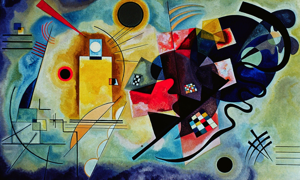

Style 1:  style/girls.jpg


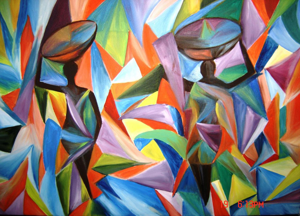

Style 2:  style/kandinsky.jpg


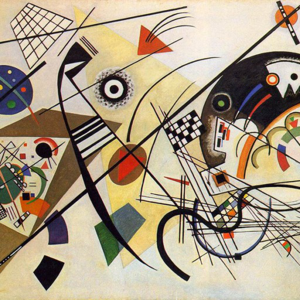

Style 3:  style/style20.jpg


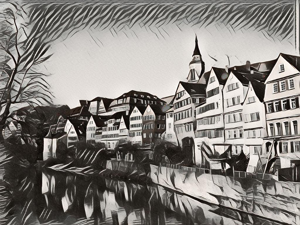

Style 4:  style/young.jpg


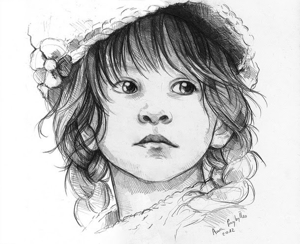

In [20]:
import PIL
from IPython.display import display, Image
for i,r in enumerate(list(styles['image'])):
    image = PIL.Image.fromarray(r.pixel_data)
    image.thumbnail((300,300))
    print("Style " + str(i) + ": ",styles['path'][i])
    display(image)

In [0]:
# number of content images should be more than default batch_size (which is 6 currently).
# please use more content images (around 100-200) during training

content = tc.load_images('content/')

In [22]:
model = tc.style_transfer.create(styles, content, max_iterations=Niterations)
# Save the model for later use in Turi Create
timestamp = datetime.now().strftime("%Y_%m_%d_%H%M%S")
save_folder = 'output/output_' + timestamp
import os
os.mkdir(save_folder)
save_name = "/model_" + str(Nstyles) +"styles_" + str(Niterations) + "iter_"+ timestamp
model.save(save_folder + save_name + '.model')
# Export to Core ML
model.export_coreml(save_folder + save_name + '.mlmodel')

Using 'image' in style_dataset as feature column and using 'image' in content_dataset as feature column
Download completed: /var/tmp/model_cache/resnet-16.params


/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:422: UserWarning: load_params is deprecated. Please use load_parameters.
  warnings.warn("load_params is deprecated. Please use load_parameters.")


Download completed: /var/tmp/model_cache/vgg16-conv1_1-4_3.params
Using GPU to create model (Tesla K80)
Analyzing visual features of the style images
+--------------+--------------+--------------+
| Iteration    | Loss         | Elapsed Time |
+--------------+--------------+--------------+
| 1            | 25.786       | 23.5         |
| 11           | 29.431       | 33.9         |
| 21           | 34.610       | 44.2         |
| 31           | 41.268       | 54.6         |
| 41           | 56.049       | 65.0         |
| 51           | 43.626       | 75.5         |
| 61           | 34.605       | 86.0         |
| 71           | 43.676       | 96.6         |
| 81           | 41.186       | 107.1        |
| 91           | 57.649       | 117.7        |
| 101          | 37.129       | 128.4        |
| 111          | 32.375       | 139.1        |
| 121          | 27.340       | 149.8        |
| 131          | 25.370       | 160.5        |
| 141          | 23.060       | 171.2        |
| 15

Test image 0:  test/girl_full.png


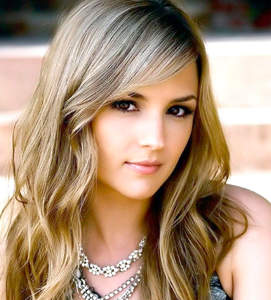

In [23]:
# Load some test images
test_images = tc.load_images('test/')
import PIL
from IPython.display import display, Image
for i,r in enumerate(list(test_images['image'])):
    image = PIL.Image.fromarray(r.pixel_data)
    image.thumbnail((300,300))
    print("Test image " + str(i) + ": ",test_images['path'][i])
    display(image)

In [24]:
# Stylize the test images
stylized_images = model.stylize(test_images)

Stylizing 1 image(s) using 5 style(s)
Stylizing 4/5
Stylizing 5/5


output/output_2018_12_18_124116/output_c0_s0_Yellow-Red-Blue.jpg


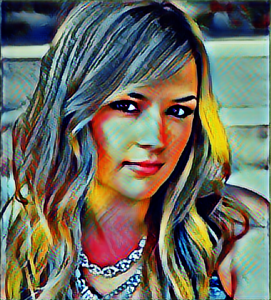

output/output_2018_12_18_124116/output_c0_s1_girls.jpg


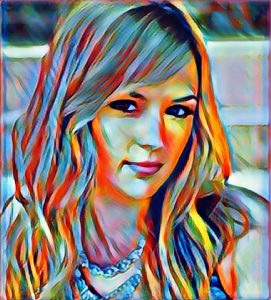

output/output_2018_12_18_124116/output_c0_s2_kandinsky.jpg


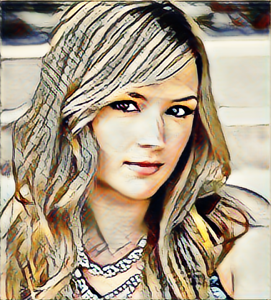

output/output_2018_12_18_124116/output_c0_s3_style20.jpg


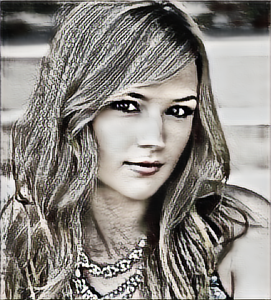

output/output_2018_12_18_124116/output_c0_s4_young.jpg


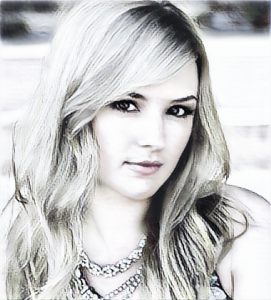

In [25]:
import PIL
from IPython.display import display, Image
for i,r in enumerate(list(stylized_images['stylized_image'])):
    r_name = save_folder + "/output_c"
    style_id = stylized_images['style'][i]
    style_name = styles['path'][style_id].split("/")[1].split(".")[0]
    r_name = r_name + str(stylized_images['row_id'][i]) + "_s" + str(style_id) + "_" + style_name  +".jpg"
    print(r_name)
    r.save(r_name)
    image = PIL.Image.fromarray(r.pixel_data)
    image.thumbnail((300,300))
    display(image)

Download the CoreML model:

In [0]:
from google.colab import files
files.download(save_folder + save_name + '.mlmodel')

The next step is the integration of the CoreML model with an iOS11 app. For this step, see the following examples:


*   [TuriCreate Style Transfer That Works](https://medium.com/datadriveninvestor/turicreate-style-transfer-that-works-13b9774c70b1)
*   [Creating a Prisma-like App with Core ML, Style Transfer and Turi Create](https://www.appcoda.com/coreml-turi-create/)

